# Creating a dialog engine using TensorFlow, Keras, and NLP
## A process using kmeans to classify subjects of dialog

# - Data
### I need dialog to train my project model
#### Didn't want movie dialog, because I would need to filter out a lot of text
- movie can have a narrator
- a scene may contain a large cast of characters, the model is designed for one-to-one dialog
- A single character may be speaking, or singing, to themselves

#### What about game dialog?
- RPGs with dialog trees, and dating simulator games have 1-on-1 conversations
- Video game characters speak in a way towards choice, and move the story along
- Video games communicate lots of character and party information that will need to be cleaned.

#### Where can I find some game dialogs to work with?
- There are no online resources for video game dialog, not even on Kaggle
- I have contacts in the fan translation scene "Fan Translators Int."

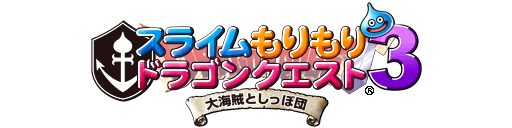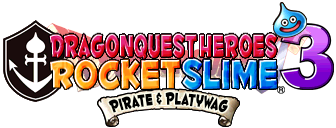

#### Reaching out, I spoke with one of the groups translators, he gave me the scripts to Four games he's translated

#### Issues with .po files
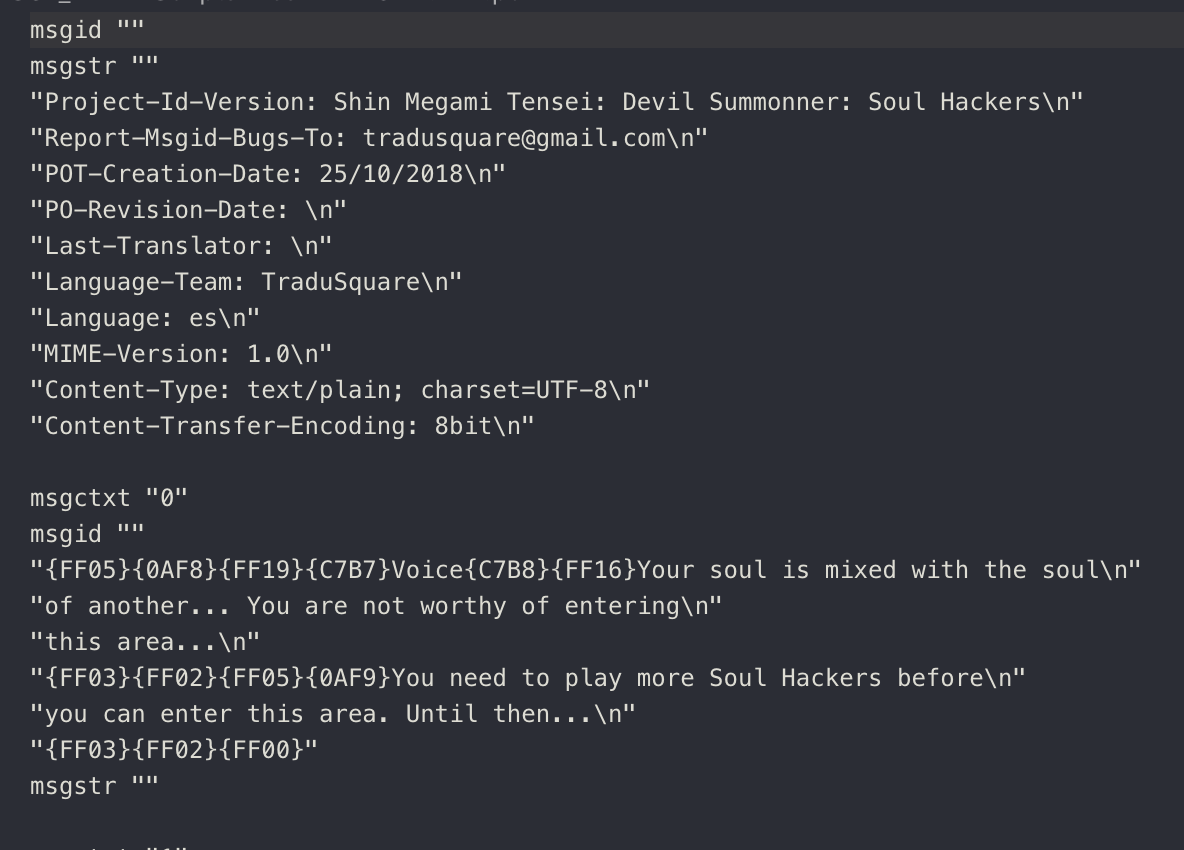

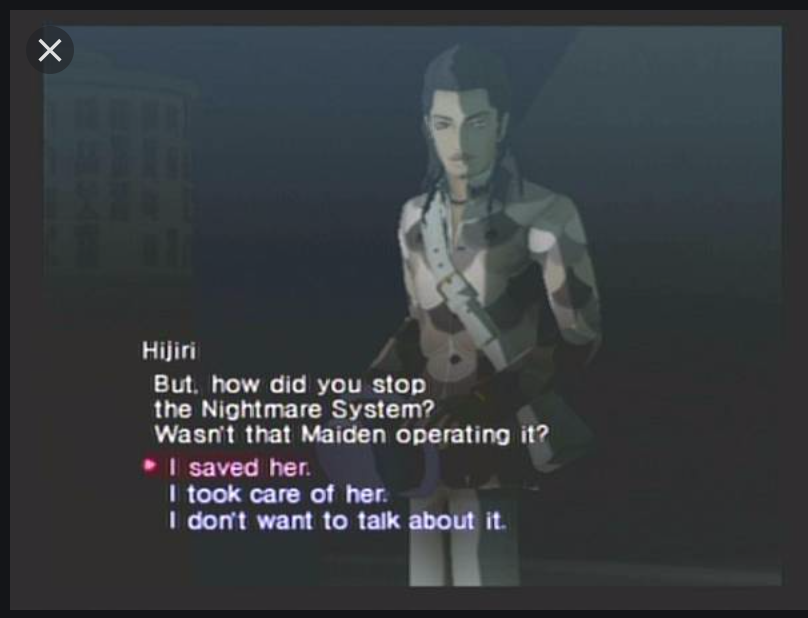

- dialog has a character name to be removed
- text is broken into multiple lines to fit within a dialog area to prevent overflow
- dialog has embedded the possible player responses that need to be removed
- the end of a dialog block needed to be marked. I used the reverse camelcase word 'lINEbREAK'

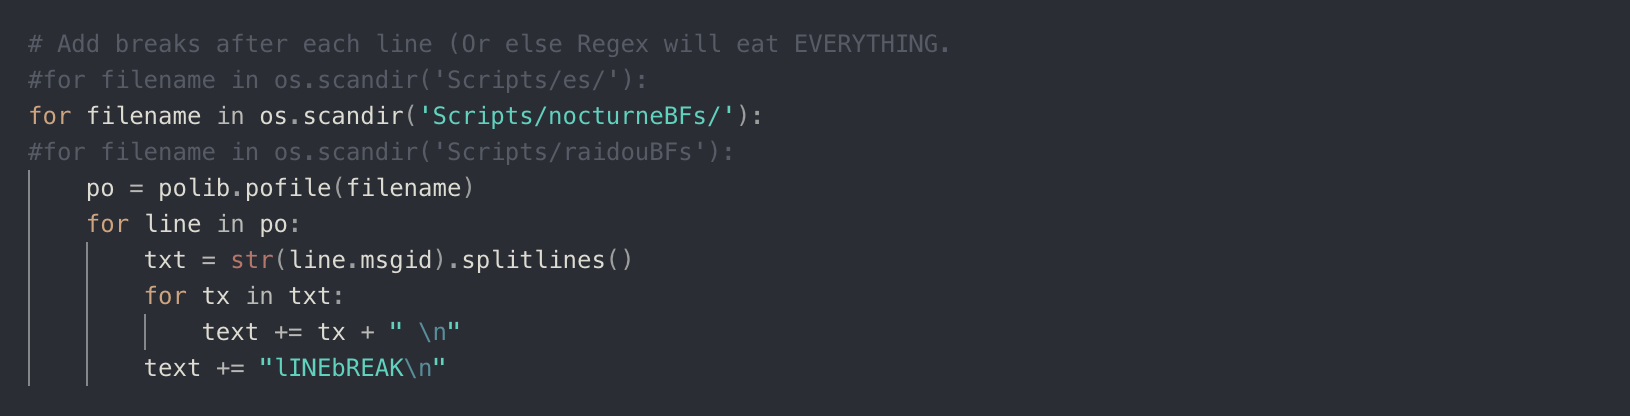

### Datacleaning
- This game had interactions with treasure boxes, puzzles, and traps all communicated through the dialog engine. These blocks needed to be filtered out
- Each game had it's own markdown style that told the game what images to show on the screen, the majority of these were filtered out. In the case where they game filled in a players name is still valuable text, we just needed to replace the instance.

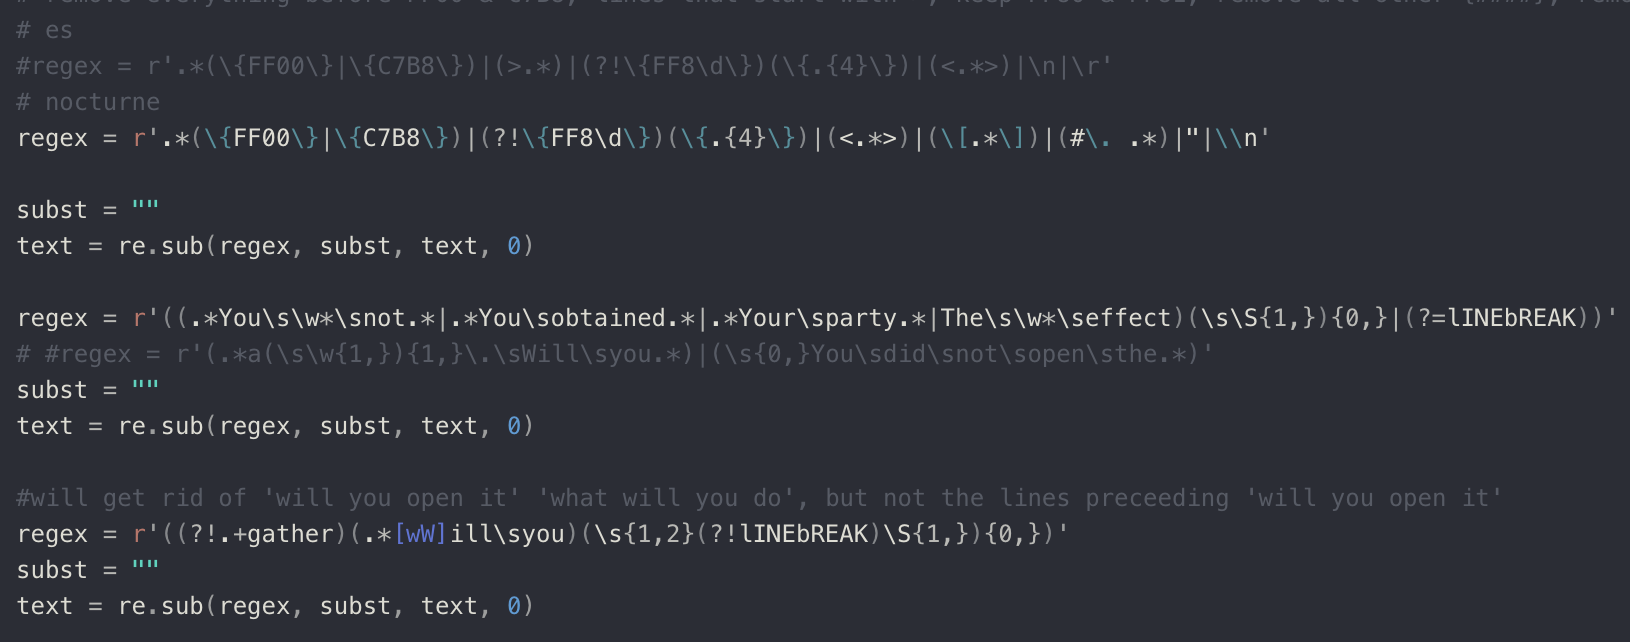

### Saving as text, importing text into jupyter

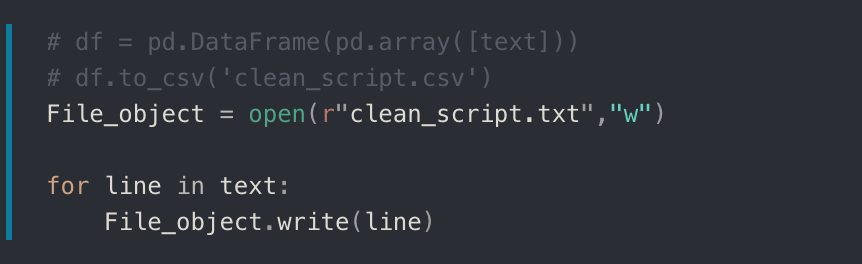

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.spatial import distance

In [137]:
with open('clean_script_Persona_Nocturne.txt', 'r') as file:
    data1 = file.read().split('\n')

In [138]:
df2 = pd.read_csv('clean_script_Persona_Raidou.csv')
df3 = pd.read_csv('clean_script_Soul_Hackers.csv')

In [139]:
data1[:10]

['',
 'Shinjuku Station ',
 "It's as quiet as a tomb. ",
 'Nothing is showing on the giant screen ',
 "You don't know where you are? You're joking, right? ",
 'Tokyo, of course! ',
 'All of the humans are gone, though. ',
 'Hmmm I just passed through Shinjuku, so ',
 'If I go south, I should reach Yoyogi and Shibuya. ',
 'I just saw a girl heading toward Shibuya. ']

In [140]:
del data1[0]

In [141]:
data1[:10]

['Shinjuku Station ',
 "It's as quiet as a tomb. ",
 'Nothing is showing on the giant screen ',
 "You don't know where you are? You're joking, right? ",
 'Tokyo, of course! ',
 'All of the humans are gone, though. ',
 'Hmmm I just passed through Shinjuku, so ',
 'If I go south, I should reach Yoyogi and Shibuya. ',
 'I just saw a girl heading toward Shibuya. ',
 'I guess she really was a human ']

In [155]:
len(data1)

8868

In [145]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data1)

In [147]:
X.shape

(8868, 4521)

In [153]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [161]:
sum_of_squared_distances = []
K = range(100,110)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)

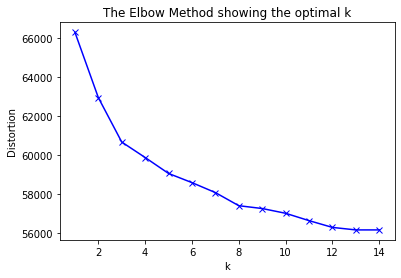

In [160]:
# Plot from 1 - 15
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

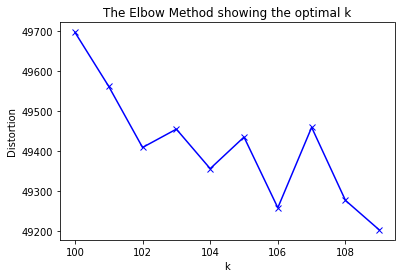

In [162]:
# Plot from 100 - 110
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## BEFORE / AFTER Regex

In [ ]:
# ----- BEFORE REGEX -----
#>Yes.
#  You did not open the Cache Cube. 
#> It's empty. 
#  You obtained . 
#  You obtained the Magatama . 
#  You obtained . 
#> It's a trap. 
#  Your party took damage. 
#> It's empty. 
#>  found something. 
# ............ > You obtained . 
#> It can't be used here. 

# ----- AFTER REGEX -----
# Yes. 
# It's empty. 
# It's a trap. 
# It's empty. 
# found something. 
# It can't be used here. 

### Identifying further issues

In [ ]:
# Do you find yourself in need of guidance? 
# Very well. 
# Take this 
# This is nothing, considering it's for the sake of this world. 
# Please be careful 
# I see 
# My friend told me that he ran into an oni after falling into a hole. 
# I didn't see an oni on this floor, though. 
# Thank goodness 
# You came from Ikebukuro? 
# Were you attacked by an oni? Luckily, I wasn't 
# Kuramae Station--! 
# The end of the Ikebukuro Line--! 
# You can get to the city of Asakusa from the exit. 
# Asakusa is north of the exit. 
# Is there anything good on the floor? 
# Yes. 
# Add which candelabrum to your inventory? 
# Compassion 
# What do you want to do? 
# Black Visor flag on 
# Black Visor flag on 
# The hole is blocked 
# The path is blocked 

- Issue1: small sentences
- Issue2: repeating text

#### reduce the number of elements

In [165]:
dat1 = np.array(data1)

In [174]:
dat1 = np.unique(dat1)

In [178]:
print (len(data1))
print (len(dat1))

8868
6949


#### remove the small sentences

In [206]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dat1)

In [207]:
X.shape
#still a column length of 4521

(6949, 4521)

In [ ]:
#This shape is very long, we wanted to remove the short sentences... however we discovered bad sentences
#np.unique had sorted all of our results

In [230]:
print(dat1[30:40])
print(dat1[135:155])

['(dead phrase) ' '(message for checking bug) ' '(no message) ' '). . '
 '). . , ' '*chuckle* '
 "*chuckle* As I haaaad been saying, it's not time yet. "
 "*chuckle* Don't even try to resist "
 "*chuckle* The demon boy is right. We shouldn't daaaash into things! "
 '*cough* ']
['3F 4F ' '4F ' '500 should do the trick! ' '5F ' '5F 4F 3F ' '? '
 '? , you say? ' '? . ' '? A letter from him? '
 '? Find anything interesting? '
 "? I see no point in staying here if we can't find Ms. . " "? It's me. "
 "? That's the goal. " 'A Manikin is doing something. '
 'A Manikin must have stolen it and fled, in hopes of returning to the Vortex World. '
 'A Mantra demon ' 'A big group of Manikins went downstairs. '
 'A bright future. '
 'A bunch of Mantra demons came through here on their way to fight Nihilo. '
 'A buncha Manikins just walked right in there! ']


In [238]:
print(dat1[148])

A Manikin is doing something. 


In [240]:
dat1 = dat1[148:]

In [241]:
print(dat1[:10])

['A Manikin is doing something. '
 'A Manikin must have stolen it and fled, in hopes of returning to the Vortex World. '
 'A Mantra demon ' 'A big group of Manikins went downstairs. '
 'A bright future. '
 'A bunch of Mantra demons came through here on their way to fight Nihilo. '
 'A buncha Manikins just walked right in there! '
 'A buncha people were killed. You could hear the sirens wailing all night long. '
 'A ceremony is about to start. It seems very fishy indeed '
 'A ceremony is being prepared. It seems fishy ']


In [242]:
print (len(dat1))

6801


In [201]:
print(X[10])

  (0, 4030)	2
  (0, 2116)	1
  (0, 2111)	1
  (0, 2586)	1
  (0, 1220)	1
  (0, 261)	1
  (0, 3959)	1
  (0, 3091)	1
  (0, 3949)	1
  (0, 3974)	1
  (0, 143)	1


In [197]:
print(X[12])

  (0, 2633)	1
  (0, 4450)	1


In [198]:
print(X[13])

  (0, 3497)	1


In [199]:
print(X[20])

In [203]:
X[10].shape

(1, 4521)

In [215]:
sum(X[10])

<1x4521 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [244]:
# Removing items with a low number of elements will not reduce the length of our columns. 
# instead, we need to removed these small sentences before they are tokenised

In [248]:
dat1[21]

'A girl '

In [249]:
len(dat1[21])

7

In [257]:
d_lengths = {}
for line in dat1:
    length = len(line)
    if length not in d_lengths:
        d_lengths[length] = 1
    else:
        d_lengths[length] += 1

In [270]:
#s = pd.Series(d_lengths) #not needed, but kept as useful way to turn dict into a series

### - X = Number of characters in sentence
### - Y = Number of sentences

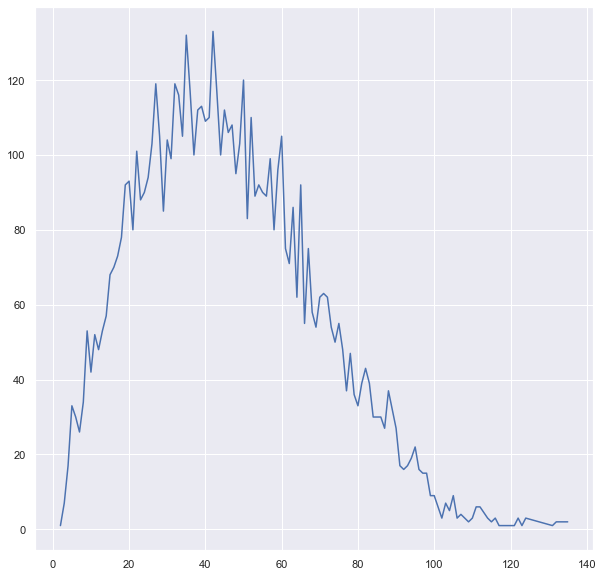

In [280]:
lists = sorted(d_lengths.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [279]:
print(lists)

[(2, 1), (3, 7), (4, 17), (5, 33), (6, 30), (7, 26), (8, 34), (9, 53), (10, 42), (11, 52), (12, 48), (13, 53), (14, 57), (15, 68), (16, 70), (17, 73), (18, 78), (19, 92), (20, 93), (21, 80), (22, 101), (23, 88), (24, 90), (25, 94), (26, 103), (27, 119), (28, 105), (29, 85), (30, 104), (31, 99), (32, 119), (33, 116), (34, 105), (35, 132), (36, 117), (37, 100), (38, 112), (39, 113), (40, 109), (41, 110), (42, 133), (43, 117), (44, 100), (45, 112), (46, 106), (47, 108), (48, 95), (49, 103), (50, 120), (51, 83), (52, 110), (53, 89), (54, 92), (55, 90), (56, 89), (57, 99), (58, 80), (59, 96), (60, 105), (61, 75), (62, 71), (63, 86), (64, 62), (65, 92), (66, 55), (67, 75), (68, 58), (69, 54), (70, 62), (71, 63), (72, 62), (73, 54), (74, 50), (75, 55), (76, 48), (77, 37), (78, 47), (79, 36), (80, 33), (81, 39), (82, 43), (83, 39), (84, 30), (85, 30), (86, 30), (87, 27), (88, 37), (89, 32), (90, 27), (91, 17), (92, 16), (93, 17), (94, 19), (95, 22), (96, 16), (97, 15), (98, 15), (99, 9), (100,

### - X = Number of words in sentence
### - Y = Number of sentences

In [281]:
d_words = {}
for line in dat1:
    length = len(line.split())
    if length not in d_words:
        d_words[length] = 1
    else:
        d_words[length] += 1

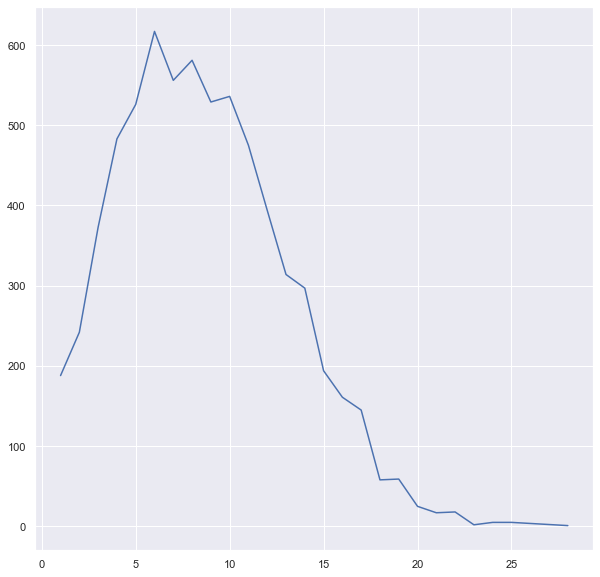

In [283]:
lists = sorted(d_words.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [284]:
print(lists)

[(1, 188), (2, 242), (3, 373), (4, 483), (5, 526), (6, 617), (7, 556), (8, 581), (9, 529), (10, 536), (11, 475), (12, 394), (13, 314), (14, 297), (15, 194), (16, 161), (17, 145), (18, 58), (19, 59), (20, 25), (21, 17), (22, 18), (23, 2), (24, 5), (25, 5), (28, 1)]


In [297]:
print(lists[:5])

[(1, 188), (2, 242), (3, 373), (4, 483), (5, 526)]


In [301]:
data_trim = []
for line in dat1:
    length = len(line.split())
    if length > 5:
        data_trim.append(line)

In [332]:
print (len(data1))
print (len(dat1))
print (len(data_trim))

8868
6801
4989


In [304]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_trim)

In [307]:
print(X.shape)
#previous (6949, 4521)

(4989, 4168)


In [313]:
sum_of_squared_distances = []
K = range(1000,1010)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)

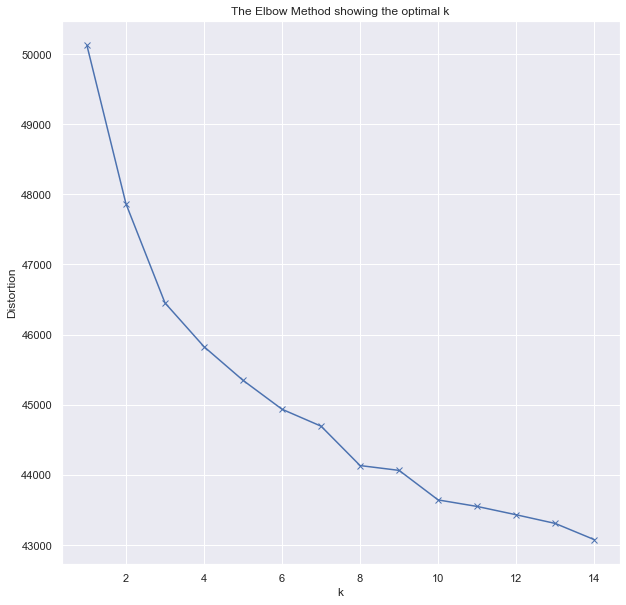

In [309]:
# Plot from 1 - 15
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### original is range of 66k - 56k. Also with what could be an elbow at #8

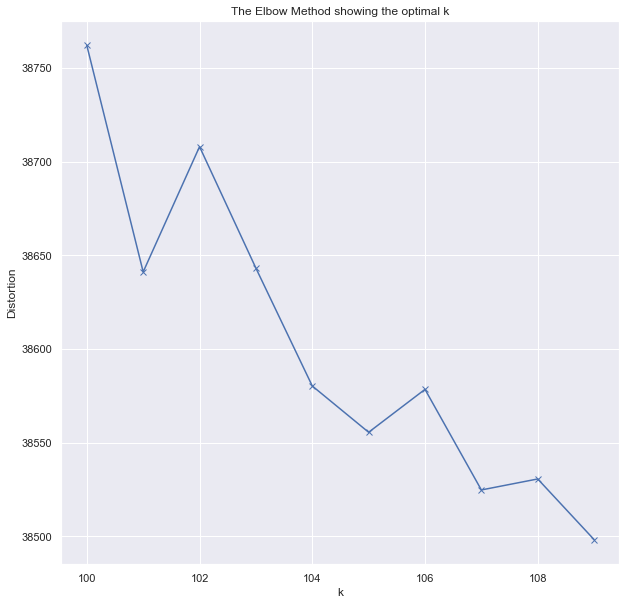

In [311]:
# Plot from 100 - 110
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### original is 49700 - 49200

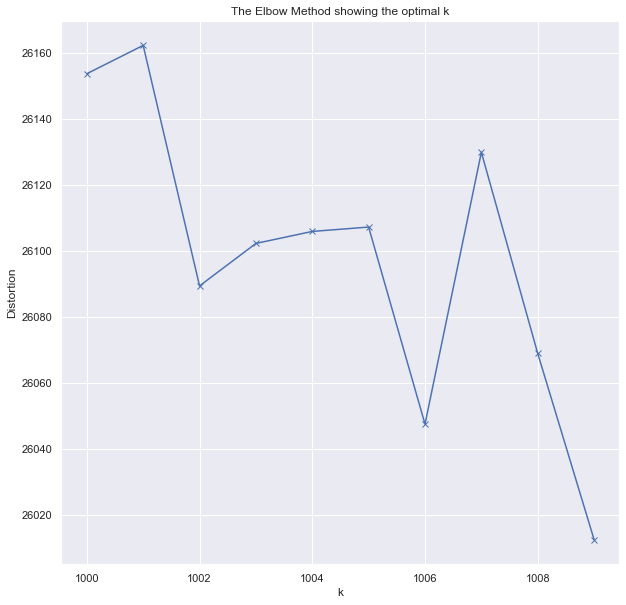

In [314]:
# Plot from 1000 - 1010
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [324]:
print (vectorizer.vocabulary_)

{'manikin': 2215, 'must': 2364, 'have': 1678, 'stolen': 3449, 'it': 1931, 'and': 155, 'fled': 1387, 'in': 1845, 'hopes': 1783, 'of': 2470, 'returning': 2998, 'to': 3715, 'the': 3647, 'vortex': 3960, 'world': 4114, 'big': 391, 'group': 1598, 'manikins': 2216, 'went': 4032, 'downstairs': 1078, 'bunch': 496, 'mantra': 2221, 'demons': 929, 'came': 523, 'through': 3693, 'here': 1724, 'on': 2481, 'their': 3649, 'way': 4014, 'fight': 1351, 'nihilo': 2414, 'buncha': 497, 'just': 1971, 'walked': 3972, 'right': 3015, 'there': 3653, 'people': 2607, 'were': 4033, 'killed': 1997, 'you': 4158, 'could': 797, 'hear': 1693, 'sirens': 3274, 'wailing': 3965, 'all': 125, 'night': 2412, 'long': 2137, 'ceremony': 575, 'is': 1926, 'about': 26, 'start': 3419, 'seems': 3160, 'very': 3933, 'fishy': 1373, 'indeed': 1856, 'being': 363, 'prepared': 2733, 'complete': 716, 'circle': 623, 'stillness': 3446, 'harmony': 1667, 'with': 4089, 'workings': 4112, 'time': 3707, 'demon': 927, 'born': 433, 'exchange': 1262, 'fo

In [325]:
km = KMeans(n_clusters=8)
km.fit(X)
print(km.cluster_centers_)

[[0.         0.00176367 0.00176367 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01290323 0.         0.        ]
 [0.         0.00203874 0.         ... 0.00101937 0.         0.        ]
 ...
 [0.         0.00084746 0.00084746 ... 0.00169492 0.00169492 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00397614 0.         0.         ... 0.         0.         0.        ]]


In [329]:
vectorizer.get_feature_names()

['000',
 '100',
 '1000',
 '10000',
 '100000',
 '12',
 '15000',
 '150000',
 '20',
 '200',
 '200000',
 '203',
 '30000',
 '500',
 '50000',
 '5f',
 '5th',
 '60',
 '70000',
 'aaaaaall',
 'abandoned',
 'abhored',
 'abilities',
 'ability',
 'able',
 'abominable',
 'about',
 'above',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'abundant',
 'abyss',
 'accept',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accessing',
 'accident',
 'accidents',
 'accompany',
 'accompanying',
 'accomplice',
 'accomplish',
 'accordance',
 'according',
 'accordingly',
 'accumulated',
 'accurately',
 'accused',
 'ace',
 'ache',
 'achieve',
 'achieved',
 'aciel',
 'acquire',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activate',
 'activated',
 'activities',
 'activity',
 'acts',
 'actual',
 'actually',
 'adapting',
 'add',
 'addition',
 'additional',
 'adjourned',
 'admirable',
 'admired',
 'admit',
 'adults',
 'advantage',
 'advantages',
 'advent',
 'adventurous',
 'adversaries',

In [333]:
File_object = open(r"cleaner_script.txt","w")

for line in data_trim:
    File_object.write(line+'\n')

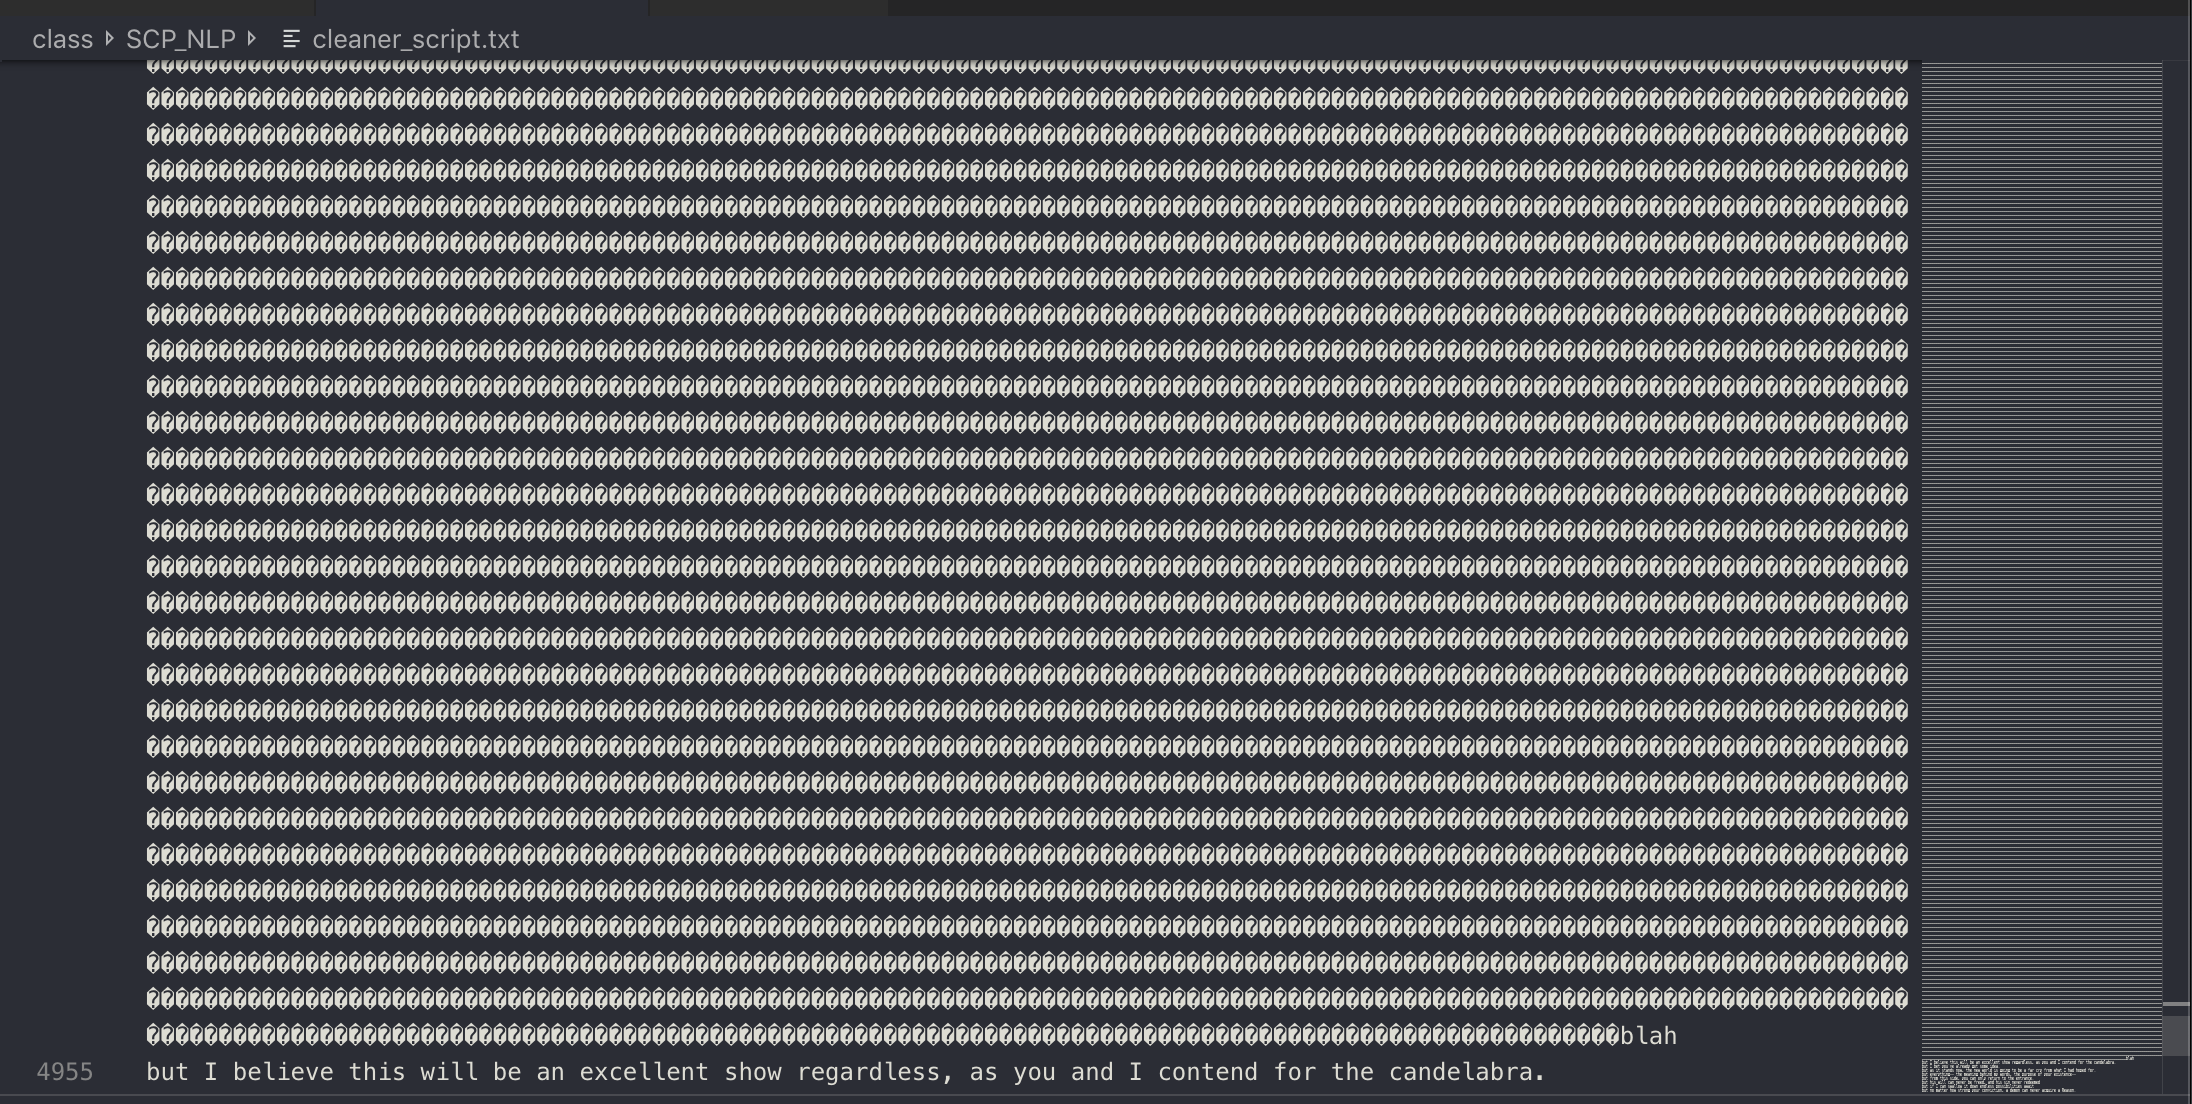
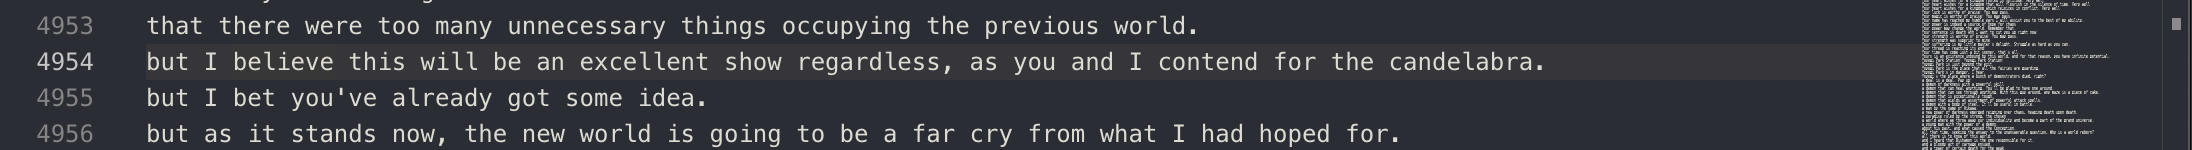
- I believe this was file padding, to make the dialog files appear the same size as the originals